## Predicting Stock Prices for Large Cap Technology Companies DS II

## Company Opted for Predicting the Stock Prices : APPLE

_______________________________________________________________________________________________________________________________

# Linear Regression

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [ ]:
df=pd.read_csv('EDA_HD APPLE.csv',parse_dates = ["Date"], index_col = "Date")

In [ ]:
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.13,56877940,127.21,127.75,126.5200
2021-06-08,126.74,74403770,126.60,128.46,126.2101
2021-06-07,125.90,71057550,126.17,126.32,124.8321
2021-06-04,125.89,75169340,124.07,126.16,123.8500
2021-06-03,123.54,76229170,124.68,124.85,123.1300


In [ ]:
df.tail()

,Close,Volume,Open,High,Low
Date,,,,,
2011-06-16,11.6129,507299317,11.6750,11.7386,11.3689
2011-06-15,11.6696,395841722,11.7768,11.7964,11.6029
2011-06-14,11.8729,333995906,11.7857,11.9018,11.7611
2011-06-13,11.6643,329376468,11.6857,11.7254,11.6096
2011-06-10,11.6393,433801306,11.8054,11.8450,11.6254


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   Volume  2516 non-null   int64  
 2   Open    2516 non-null   float64
 3   High    2516 non-null   float64
 4   Low     2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


### Splitting the Data

In [ ]:
df_X=df.loc[:,df.columns != 'Close']
df_Y=df['Close']
X_train, X_test, y_train, y_test =train_test_split(df_X,df_Y,test_size=0.25)
print(X_train.head())
print(y_train.head())

               Volume      Open      High       Low
Date                                               
2013-03-06  459441176   15.5182   15.5446   15.1582
2016-07-07   97843400   23.9250   24.1250   23.9050
2020-02-25  230673440   75.2375   75.6325   71.5325
2021-02-04   84183060  136.3000  137.4000  134.5900
2014-11-10  108264240   27.2550   27.3325   27.1675
Date
2013-03-06     15.2022
2016-07-07     23.9850
2020-02-25     72.0200
2021-02-04    137.3900
2014-11-10     27.2075
Name: Close, dtype: float64


In [ ]:
X_train.shape

(1887, 4)

In [ ]:
X_test.shape

(629, 4)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-5.46135250e-11 -5.54883546e-01  8.21210851e-01  7.33054054e-01]


In [ ]:
print(regressor.intercept_)

0.018732098967042532


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

               Volume      Open      High       Low
Date                                               
2016-02-16  192130400   23.7550   24.2125   23.6525
2013-06-10  449957580   15.8832   16.0385   15.6000
2011-11-18  371858051   13.5329   13.5711   13.3886
2013-08-19  509606516   18.0122   18.3479   18.0000
2018-05-02  265818880   43.8062   44.4375   43.4500
...               ...       ...       ...       ...
2012-11-26  628953108   20.5679   21.0714   20.4897
2018-06-21  102596960   46.8125   47.0875   46.2350
2015-02-03  207368320   29.6250   29.7725   29.4025
2021-02-02   83305370  135.7300  136.3100  134.6100
2015-08-04  494407600   29.3550   29.4250   28.3125

[629 rows x 4 columns]


In [ ]:
predicted.shape

(629,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dframe=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [ ]:
dframe.head()

,Actual Price,Predicted Price
Date,,
2016-02-16,24.1600,24.049109
2013-06-10,15.6746,15.787465
2011-11-18,13.3907,13.448542
2013-08-19,18.1336,18.258695
2018-05-02,44.1425,44.040631


In [ ]:
dframe.tail()

,Actual Price,Predicted Price
Date,,
2012-11-26,21.0547,20.895713
2018-06-21,46.3650,46.599163
2015-02-03,29.6625,29.572104
2021-02-02,134.9900,135.315496
2015-08-04,28.6600,28.621846


In [ ]:
accuracy=regressor.score(X_test,y_test)
print('Accuracy:',accuracy*100)

Accuracy: 99.98489077541532


In [ ]:
print('Mean Absoluter Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absoluter Error: 0.1945210531867696


In [ ]:
error = mean_squared_error(y_test,predicted)
print('Mean Squared Error:',error)

Mean Squared Error: 0.14502005951874697


In [ ]:
graph=dframe.head(20)

<AxesSubplot:xlabel='Date'>

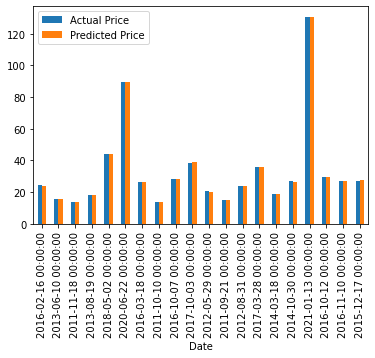

In [ ]:
graph.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

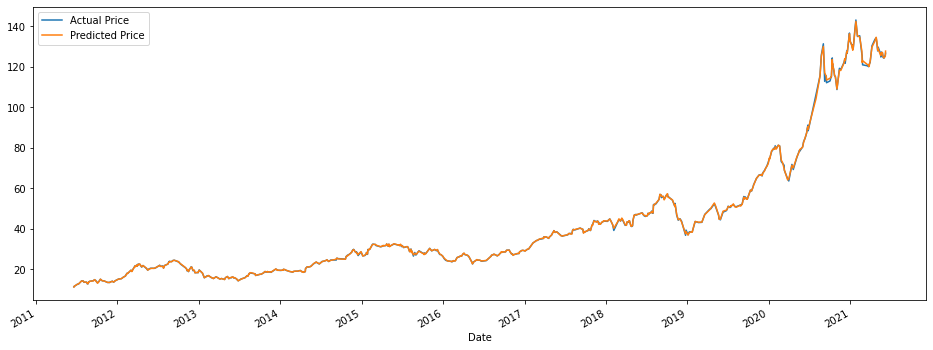

In [ ]:
dframe.plot(figsize=(16,6))